# <span style="color:green"> Laboratorio di simulazione numerica (LSN) </span>
## <span style="color:blue">  Esercitazione numerica 9 </span>

## Moduli
Si importano moduli e librerie utili per il notebook. Inoltre si inizializzano i parametri di matplotlib.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams["legend.loc"] = 'center right'

## Esercizio 09.1: <span style="color:brown"> Il problema del commesso viaggiatore </span>
Il problema del commesso viaggiatore (TSP) è unproblema i ottimizzazione che consiste nel dover visitare un numero $N_{cities}$ di città, ciascuna una sola volta, tornando poi alla città di partenza; tra tutti i percorsi possibili tra le varie città si deve trovare quello di lunghezza minima.\
A questo scopo si implementa un **Algoritmo Genetico** (GA), che permette di partire da una popolazione di percorsi su cui si agisce con degli operatori di mutazione e un operatore di crossover. Questi operatori fanno variare la posizione delle singole città in modo da creare percorsi con lunghezze diverse.\
Vengono implementati i seguenti operatori di mutazione:
1. **permutazione a coppie**: si scelgono due città nel percorso e vengono scambiate.
2. **shift di $n$ posizioni per $m$ città**: si scelgono $m$ città contigue e le si trasla di $+n$ posizioni (senza eccedere la lunghezza del percorso).
3. **permutazione di $m$ città**: si scelgono $m$ città vicine e le si scambia con altrettante città diverse (mantenendo l'ordine).
4. **inversione**: Si inverte l'ordine in cui si trovano $m$ città contigue.

L'operatore di *crossover* consiste nel prendere due percorsi (padre e madre), tagliarli in un determinato punto conservandone la prima parte e aggiungendo le città mancanti in ciascun percorso (figlio) nell'ordine in cui apparivano nel "consorte".\
Ogni step dell'algoritmo genetico consiste nel generare una nuova popolazione di percorsi (generazione) e nel sostituire la vecchia con la nuova. Per fare questo si definisce un *operatore di selezione* che viene implementato con una "roulette truccata", dato che si vogliono privilegiare i percorsi a lunghezza minore.

A questo punto manca solo la definizione di una funzione per la lunghezza del percorso: si è scelta la norma $L^{(1)}$ (in cui $\vec{x}_{N_{cities}+1} \equiv \vec{x}_1$):
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_{N_{cities}}) = \sum_{i=1}^{N_{cities}} |\vec{x}_i-\vec{x}_{i+1}|
$$

**Osservazione:** per ridurre la degenerazione del percorso a lunghezza minima, si è scelto di fissare la città di partenza (in questo modo la degenerazione è 2, perchè il percorso può essere seguito in senso orario o antiorario). Quindi la prima città non viene toccata né dagli operatori di mutazione né dal crossover.

Per eseguire la simulazione con l'algoritmo genetico sono state scelte le seguenti quantità:
* $N_{cities} = 32$      numero di città da visitare
* $p_{crossover} = 0.55$ probabilità di crossover
* $p_{pair} = 0.15$      probabilità di permutazione a coppie
* $p_{shift} = 0.15$     probabilità di shift
* $p_{srange} = 0.15$    probabilità di permutazione tra $m$ città
* $p_{inv} = 0.15$       probabilità di inversione

###  Città distribuite su una circonferenza
Per questa prima simulazione sono state scelte casualmente $N_{cities} = 32$ città su una circoferenza di raggio $r=1$.\
Si riportano i grafici per la lunghezza del miglior percorso di ogni generazione, la media delle lunghezza della miglior metà di percorsi della popolazione, ad ogni generazione, e un grafico del miglior percorso.

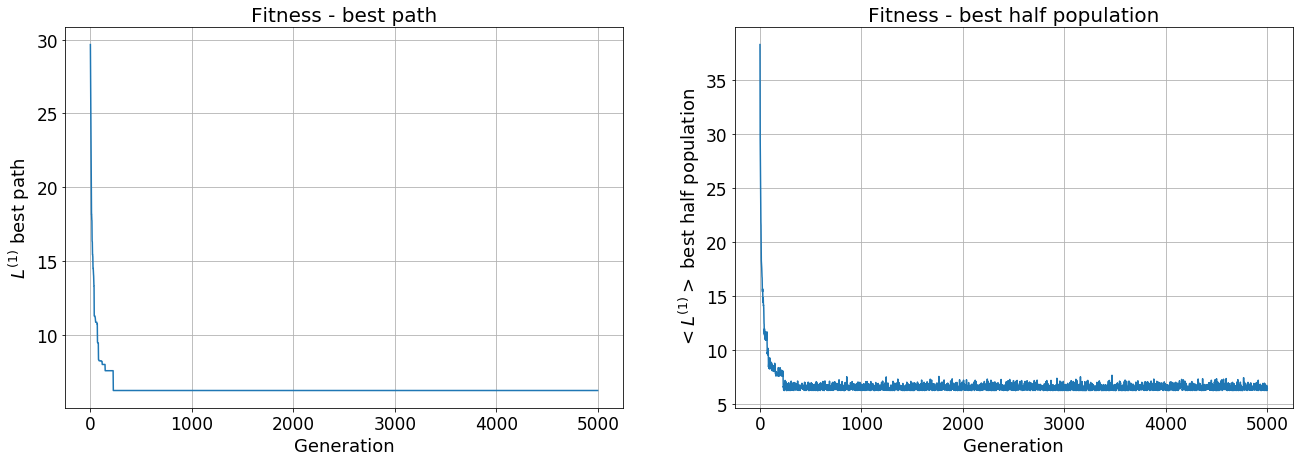

In [2]:
#load data
ave_L1 = np.loadtxt("ave_L1_circle.dat", dtype=float, max_rows=5000)
L1 = np.loadtxt("fitness_circle.dat", dtype=float, max_rows=5000)
steps = np.array([i for i in range(len(ave_L1))])

#useful for figures
ave = np.array([L1, ave_L1])
label_y = [r'$L^{(1)}$ best path', r'$<L^{(1)}>$ best half population']
labels = ["Fitness - best path", "Fitness - best half population"]

#make figures
fig, axx = plt.subplots(1, 2, figsize=(22,7))

for ax, ave, label, l_y in zip(axx, ave, labels, label_y):
    ax.plot(steps, ave)
    ax.set_title(label)
    ax.set_xlabel(r'Generation')
    ax.set_ylabel(l_y)
    ax.grid(True)

Lunghezza del miglior percorso: 6.2403


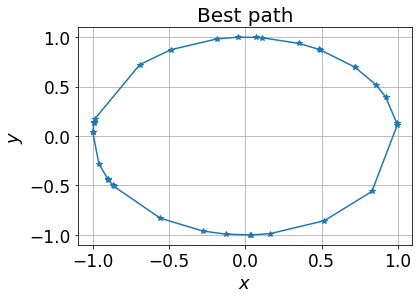

In [3]:
#make plot with best path
x, y = np.loadtxt("path_circle.dat", dtype=float, unpack=True)

x = np.append(x, x[0]) #add fist city to complete path
y = np.append(y, y[0])

print("Lunghezza del miglior percorso:", L1[-1])
plt.plot(x, y, marker='*')
plt.title(r'Best path')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

### Città distribuite all'interno di un quadrato
Per la seconda simulazione sono state scelte casualmente $N_{cities} = 32$ città all'interno di un quadrato di lato $l=2$.\
Si riportano i grafici per la lunghezza del miglior percorso di ogni generazione, la media delle lunghezza della miglior metà di percorsi della popolazione, ad ogni generazione, e un grafico del miglior percorso.

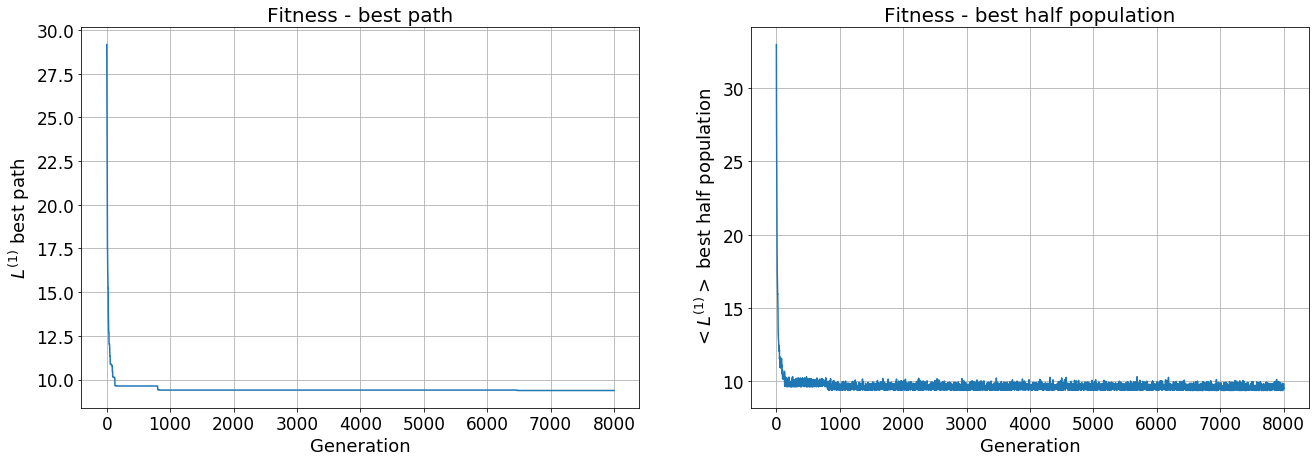

In [4]:
#load data
ave_L1 = np.loadtxt("ave_L1_square.dat", dtype=float, max_rows=8000)
L1 = np.loadtxt("fitness_square.dat", dtype=float, max_rows=8000)
steps = np.array([i for i in range(len(ave_L1))])

#useful for figures
ave = np.array([L1, ave_L1])
label_y = [r'$L^{(1)}$ best path', r'$<L^{(1)}>$ best half population']
labels = ["Fitness - best path", "Fitness - best half population"]

#make figures
fig, axx = plt.subplots(1, 2, figsize=(22,7))

for ax, ave, label, l_y in zip(axx, ave, labels, label_y):
    ax.plot(steps, ave)
    ax.set_title(label)
    ax.set_xlabel(r'Generation')
    ax.set_ylabel(l_y)
    ax.grid(True)

Lunghezza del miglior percorso: 9.37425


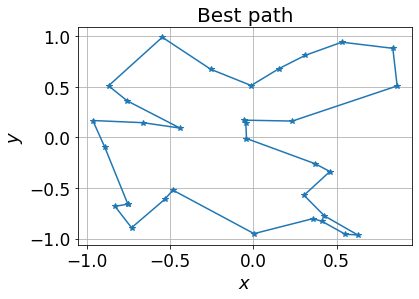

In [5]:
#make plot with best path
x, y = np.loadtxt("path_square.dat", dtype=float, unpack=True)

x = np.append(x, x[0]) #add fist city to complete path
y = np.append(y, y[0])

print("Lunghezza del miglior percorso:", L1[-1])
plt.plot(x,y, marker='*')
plt.title(r'Best path')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

**Osservazione:** i risultati dipendono fortemente dall'esponente $p$ che si sceglie per la roulette truccata dell'operatore di selezione. In questo caso è stato scelto $p=4$, perchè è quello che permette di ottenere il percorso migliore nel caso delle città distribuite in un quadrato e non altera il kiglior percorso per le città distribuite sulla circonferenza.